# HR Dataset

In [53]:
# importing the necessary libraries.
import pandas as pd
import numpy as np

# Visualization tools.
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing and Modelling.
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor



import warnings 
warnings.simplefilter("ignore")


# Used to see max row nd columns in the dataset
# pd.set_option("display.max_rows", None) 
pd.set_option("display.max_columns", None)

# 1.) Performing Preprocessing

In [2]:
df = pd.read_csv("Cleaned_HR_Data_Analysis.csv")

In [3]:
df.head()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,DOB,State,GenderCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,07-10-1969,MA,Female,White,Widowed,Fully Meets,4,14-01-2023,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,30-08-1965,MA,Male,Hispanic,Widowed,Fully Meets,3,09-09-2022,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,06-10-1991,MA,Male,Hispanic,Widowed,Fully Meets,4,27-05-2023,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,04-04-1998,ND,Male,Other,Single,Fully Meets,2,16-06-2023,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,29-08-1969,FL,Female,Other,Married,Fully Meets,3,25-11-2022,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50


In [4]:
df.tail()

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,DOB,State,GenderCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
2840,3421,09-May-22,Production Technician I,PL,Active,Part-Time,Zone A,Part-Time,Production,Wireless,11-06-1959,MA,Female,Other,Divorced,Fully Meets,1,15-02-2023,5,4,2,22-Jan-23,Customer Service,External,Passed,1,786.71,63
2841,3423,28-Dec-20,Production Technician I,SVG,Active,Part-Time,Zone A,Full-Time,Production,Engineers,10-06-2001,MA,Male,Black,Widowed,Fully Meets,3,19-09-2022,4,5,3,14-Oct-22,Technical Skills,External,Completed,1,439.65,19
2842,3424,09-Dec-20,Production Technician I,TNS,Terminated,Contract,Zone B,Temporary,Production,Wireline Construction,27-01-1997,MA,Male,White,Single,Fully Meets,2,14-03-2023,2,4,5,18-Aug-22,Project Management,Internal,Completed,5,981.13,23
2843,3425,28-May-19,Production Technician I,WBL,Terminated,Contract,Zone B,Full-Time,Production,Aerial,28-05-1954,MA,Female,Hispanic,Divorced,Fully Meets,2,25-12-2022,5,2,3,19-May-23,Technical Skills,External,Completed,3,184.27,65
2844,3426,27-Apr-22,Production Technician I,BPC,Active,Full-Time,Zone B,Temporary,Production,Field Operations,11-09-1990,MA,Female,White,Married,Fully Meets,2,24-08-2022,1,3,2,02-May-23,Leadership Development,Internal,Failed,5,675.37,32


In [5]:
df.shape

(2845, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 2845 non-null   int64  
 1   StartDate                   2845 non-null   object 
 2   Title                       2845 non-null   object 
 3   BusinessUnit                2845 non-null   object 
 4   EmployeeStatus              2845 non-null   object 
 5   EmployeeType                2845 non-null   object 
 6   PayZone                     2845 non-null   object 
 7   EmployeeClassificationType  2845 non-null   object 
 8   DepartmentType              2845 non-null   object 
 9   Division                    2845 non-null   object 
 10  DOB                         2845 non-null   object 
 11  State                       2845 non-null   object 
 12  GenderCode                  2845 non-null   object 
 13  RaceDesc                    2845 

In [7]:
# Explantion of Columns 

# Employee ID - Unique identifier assigned to each employee.
# StartDate - The date when the employee joined the company.
# Title - The job title or position of the employee.
# BusinessUnit - The division or unit within the organization where the employee works.
# EmployeeStatus - The current employment status (e.g., Active, Terminated, On Leave).
# EmployeeType - The type of employment (e.g., Full-time, Part-time, Contractor).
# PayZone - The salary or pay range category assigned to the employee.
# EmployeeClassificationType - A categorization of employees based on roles, levels, or contract types.
# DepartmentType - The department in which the employee works (e.g., HR, IT, Sales).
# Division - A larger organizational grouping within the company.
# DOB - The employee’s Date of Birth.
# State - The state where the employee is located or working.
# GenderCode - The gender of the employee (e.g., Male, Female, Non-binary).
# RaceDesc - The race or ethnicity of the employee.
# MaritalDesc - The marital status of the employee (e.g., Single, Married, Divorced).
# Performance Score - A rating of the employee’s job performance.
# Current Employee Rating - A numerical score reflecting the employee’s recent evaluation.
# Survey Date - The date when the employee engagement survey was conducted.
# Engagement Score - A score measuring the employee’s engagement level.
# Satisfaction Score - A rating of employee job satisfaction.
# Work-Life Balance Score - A rating reflecting the balance between work and personal life.
# Training Date - The date when the employee completed a training program.
# Training Program Name - The name of the training program attended.
# Training Type - The category or type of training (e.g., Technical, Leadership, Compliance).
# Training Outcome - The result or status of the training (e.g., Completed, Passed, Failed).
# Training Duration (Days) - The number of days the training lasted.
# Training Cost - The cost of the training program attended.
# Age - The age of the employee

In [8]:
df.describe()

,Employee ID,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Duration(Days),Training Cost,Age
count,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000
mean,2470.591916,2.974692,2.941652,3.028471,2.989104,2.973989,559.278956,49.448506
std,859.450107,1.012610,1.435230,1.410067,1.408816,1.419682,263.333611,17.689179
min,1001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.040000,17.000000
25%,1736.000000,2.000000,2.000000,2.000000,2.000000,2.000000,328.060000,34.000000
50%,2456.000000,3.000000,3.000000,3.000000,3.000000,3.000000,571.810000,49.000000
75%,3197.000000,3.000000,4.000000,4.000000,4.000000,4.000000,788.330000,65.000000
max,4000.000000,5.000000,5.000000,5.000000,5.000000,5.000000,999.970000,82.000000


In [9]:
df.sample(5)

,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,DOB,State,GenderCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
1633,2156,11-Sep-18,Production Technician I,MSC,Active,Part-Time,Zone B,Temporary,Production,Executive,29-01-1989,MA,Female,Black,Widowed,Exceeds,3,03-03-2023,5,1,3,19-Jan-23,Customer Service,Internal,Failed,2,763.44,29
2639,3193,28-Aug-21,Production Technician I,EW,Active,Full-Time,Zone C,Temporary,Production,General - Con,24-01-1946,MA,Female,Black,Divorced,PIP,3,05-08-2023,1,1,5,16-Apr-23,Project Management,External,Completed,3,240.94,75
678,1169,30-Jul-20,Production Technician II,BPC,Active,Contract,Zone B,Part-Time,Production,Field Operations,15-09-1960,MA,Female,Asian,Single,Fully Meets,3,03-08-2023,1,3,2,30-Jun-23,Technical Skills,Internal,Incomplete,1,487.66,60
61,3499,25-Sep-18,Area Sales Manager,WBL,Active,Part-Time,Zone C,Temporary,Sales,Field Operations,16-01-1971,KY,Female,Asian,Widowed,Fully Meets,5,21-07-2023,5,3,5,30-Jan-23,Technical Skills,Internal,Incomplete,2,762.45,47
2635,3189,04-Aug-23,Production Technician I,TNS,Active,Full-Time,Zone C,Temporary,Production,Project Management - Con,21-07-1964,MA,Female,Asian,Married,PIP,1,17-02-2023,4,3,4,11-Sep-22,Leadership Development,Internal,Passed,5,574.76,59


In [10]:
df.isnull().sum()

Employee ID                   0
StartDate                     0
Title                         0
BusinessUnit                  0
EmployeeStatus                0
EmployeeType                  0
PayZone                       0
EmployeeClassificationType    0
DepartmentType                0
Division                      0
DOB                           0
State                         0
GenderCode                    0
RaceDesc                      0
MaritalDesc                   0
Performance Score             0
Current Employee Rating       0
Survey Date                   0
Engagement Score              0
Satisfaction Score            0
Work-Life Balance Score       0
Training Date                 0
Training Program Name         0
Training Type                 0
Training Outcome              0
Training Duration(Days)       0
Training Cost                 0
Age                           0
dtype: int64

In [11]:
df.nunique().sort_values(ascending=False)

Employee ID                   2845
Training Cost                 2813
DOB                           2664
StartDate                     1472
Training Date                  366
Survey Date                    366
Age                             66
Title                           32
State                           28
Division                        25
BusinessUnit                    10
DepartmentType                   6
Training Program Name            5
Training Duration(Days)          5
RaceDesc                         5
Current Employee Rating          5
Engagement Score                 5
Satisfaction Score               5
Work-Life Balance Score          5
MaritalDesc                      4
Training Outcome                 4
Performance Score                4
EmployeeClassificationType       3
EmployeeType                     3
PayZone                          3
Training Type                    2
GenderCode                       2
EmployeeStatus                   2
dtype: int64

# Deleting column Which not needed

In [12]:
df = df.drop(columns = ["Employee ID", "StartDate","Training Date","Survey Date","DOB"])  

In [13]:
df

,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,State,GenderCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,MA,Female,White,Widowed,Fully Meets,4,1,2,3,Leadership Development,Internal,Failed,2,606.11,50
1,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,MA,Male,Hispanic,Widowed,Fully Meets,3,2,1,5,Customer Service,External,Incomplete,4,673.02,58
2,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,MA,Male,Hispanic,Widowed,Fully Meets,4,1,2,1,Leadership Development,External,Failed,2,413.28,27
3,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,ND,Male,Other,Single,Fully Meets,2,5,5,4,Project Management,External,Completed,3,663.78,23
4,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,FL,Female,Other,Married,Fully Meets,3,2,5,3,Technical Skills,External,Failed,5,399.03,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2840,Production Technician I,PL,Active,Part-Time,Zone A,Part-Time,Production,Wireless,MA,Female,Other,Divorced,Fully Meets,1,5,4,2,Customer Service,External,Passed,1,786.71,63
2841,Production Technician I,SVG,Active,Part-Time,Zone A,Full-Time,Production,Engineers,MA,Male,Black,Widowed,Fully Meets,3,4,5,3,Technical Skills,External,Completed,1,439.65,19
2842,Production Technician I,TNS,Terminated,Contract,Zone B,Temporary,Production,Wireline Construction,MA,Male,White,Single,Fully Meets,2,2,4,5,Project Management,Internal,Completed,5,981.13,23
2843,Production Technician I,WBL,Terminated,Contract,Zone B,Full-Time,Production,Aerial,MA,Female,Hispanic,Divorced,Fully Meets,2,5,2,3,Technical Skills,External,Completed,3,184.27,65


# Catagorizing Numerical and categorical Values 

# 2.) EDA

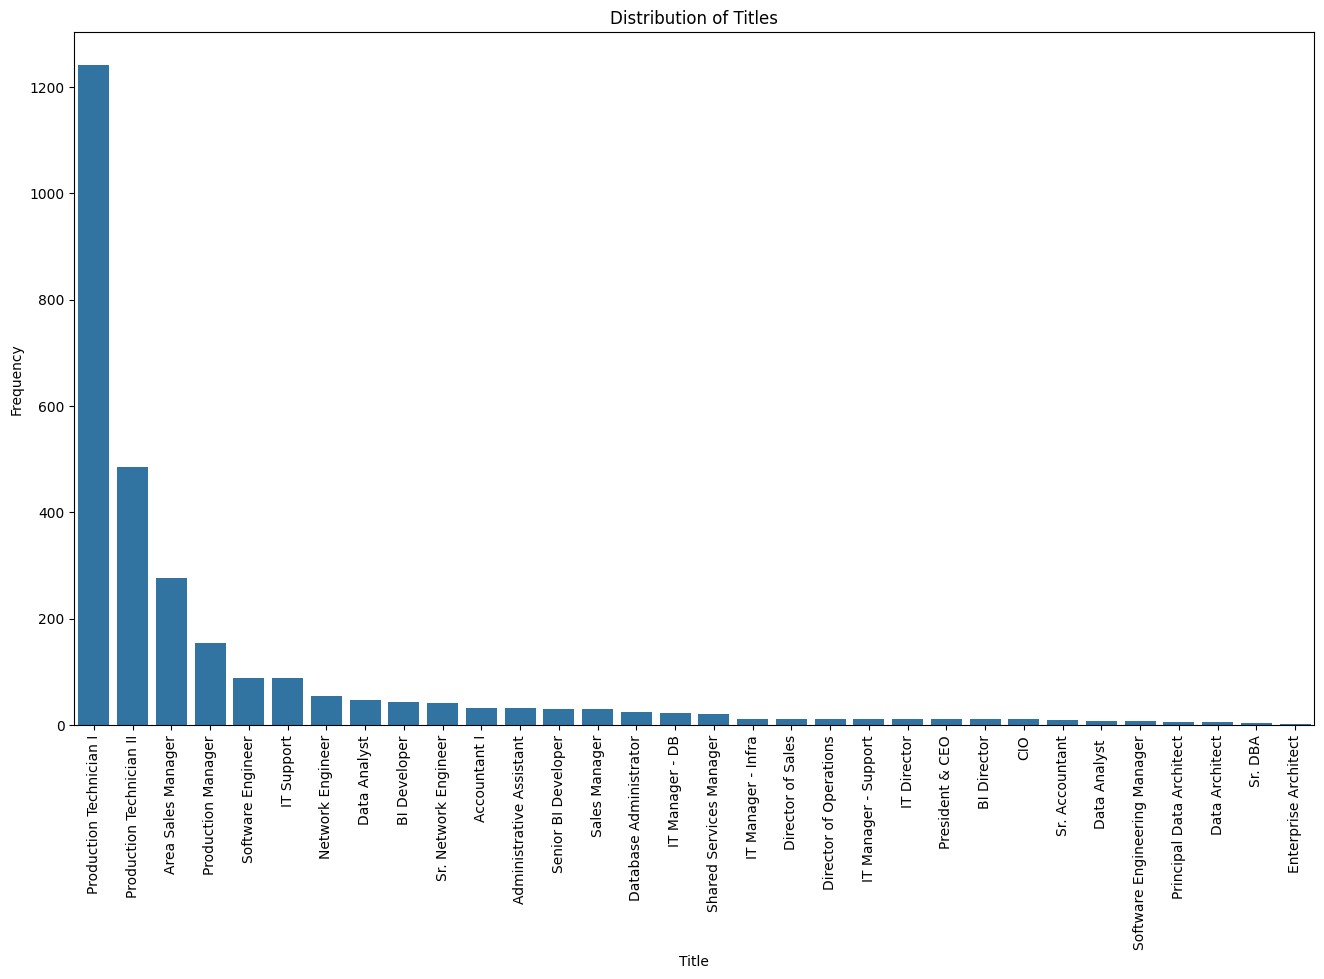

In [14]:
# Count the frequency of each Title

title_counts = df["Title"].value_counts()
plt.figure(figsize=(16, 9))
sns.barplot(x=title_counts.index, y=title_counts.values)
plt.title("Distribution of Titles")
plt.xlabel("Title", fontsize = 10)
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

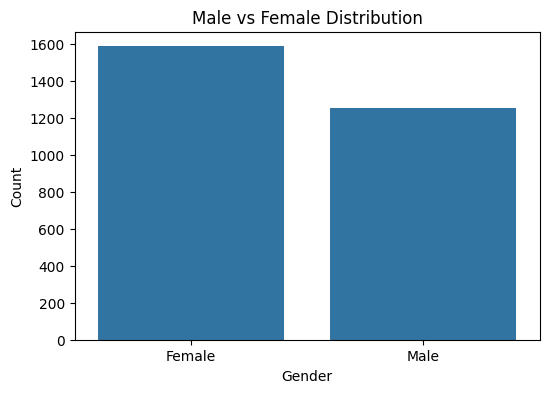

In [15]:
# Count the frequency of each value in the "GenderCode" column
gender_counts = df["GenderCode"].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x="GenderCode", data=df)
plt.title("Male vs Female Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

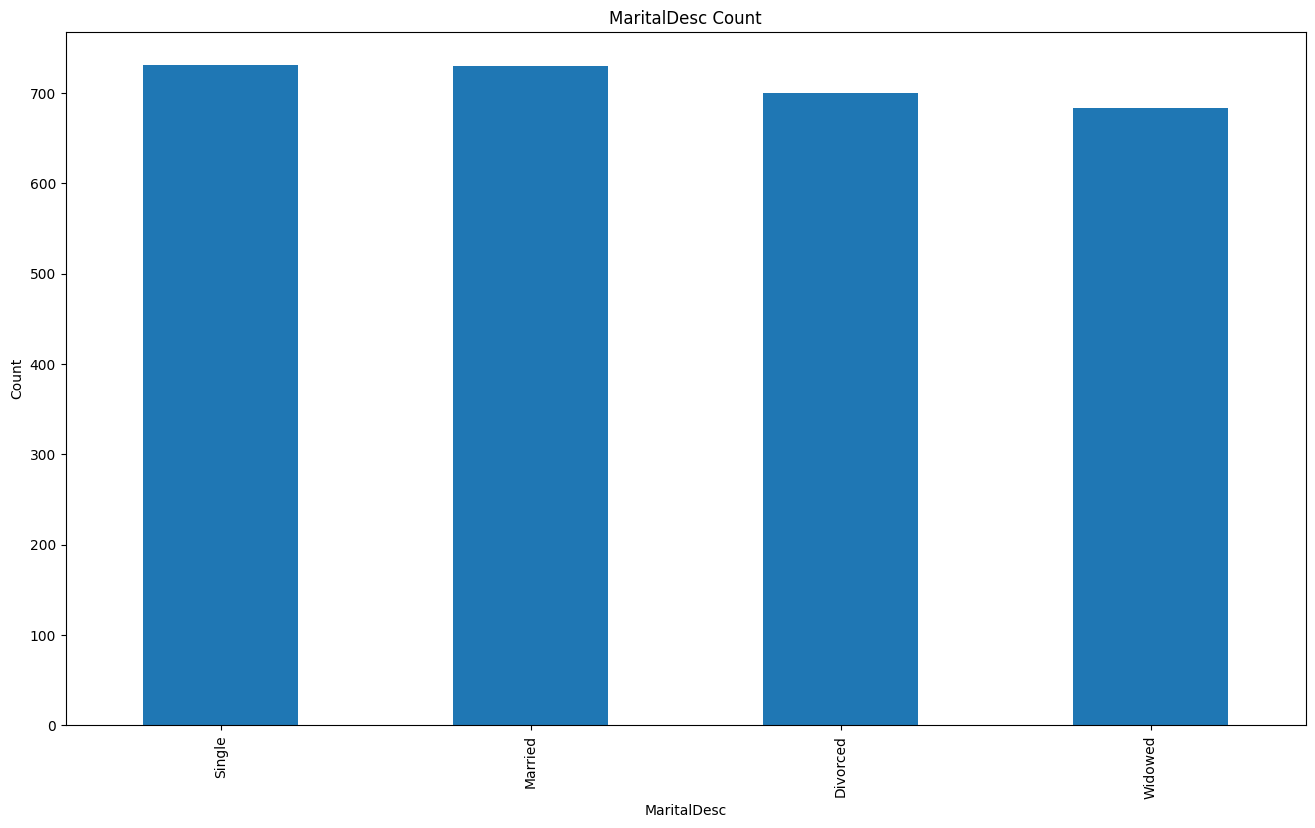

In [16]:
# Get the value counts of "MaritalDesc"
marital_counts = df["MaritalDesc"].value_counts()
plt.figure(figsize=(16, 9))
marital_counts.plot(kind="bar")
plt.title("MaritalDesc Count")
plt.xlabel("MaritalDesc")
plt.ylabel("Count")
plt.show()



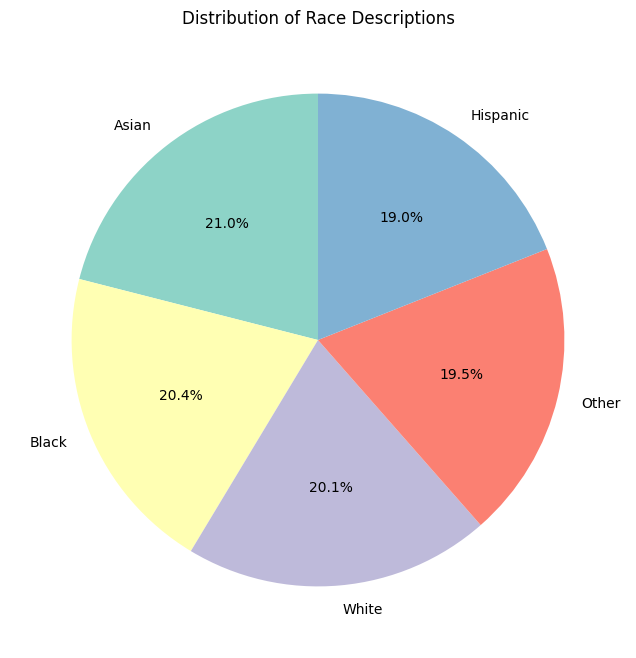

In [17]:
# Get the value counts of "RaceDesc"
RaceDesc_counts = df["RaceDesc"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(RaceDesc_counts, labels=RaceDesc_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", 
        len(RaceDesc_counts)))
plt.title("Distribution of Race Descriptions")
plt.show()

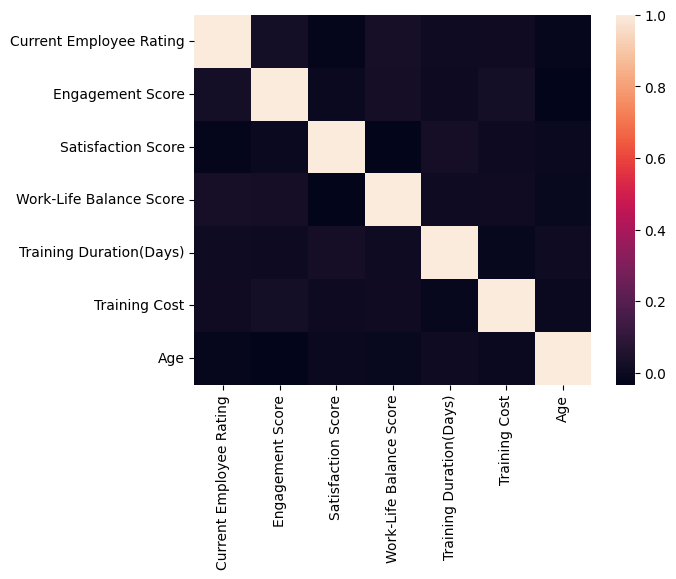

In [18]:
sns.heatmap(df.select_dtypes("number").corr());

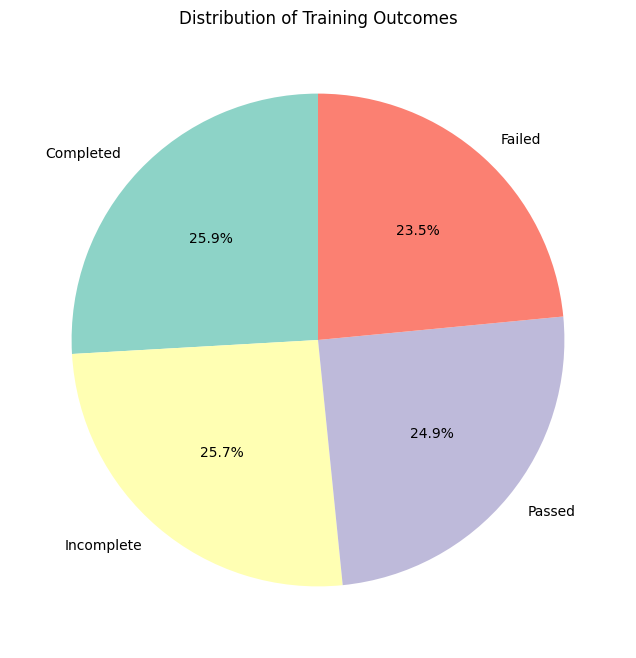

In [19]:
# Count the occurrences of each category in "Training Outcome"
outcome_counts = df["Training Outcome"].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(outcome_counts)))
plt.title("Distribution of Training Outcomes")
plt.show()

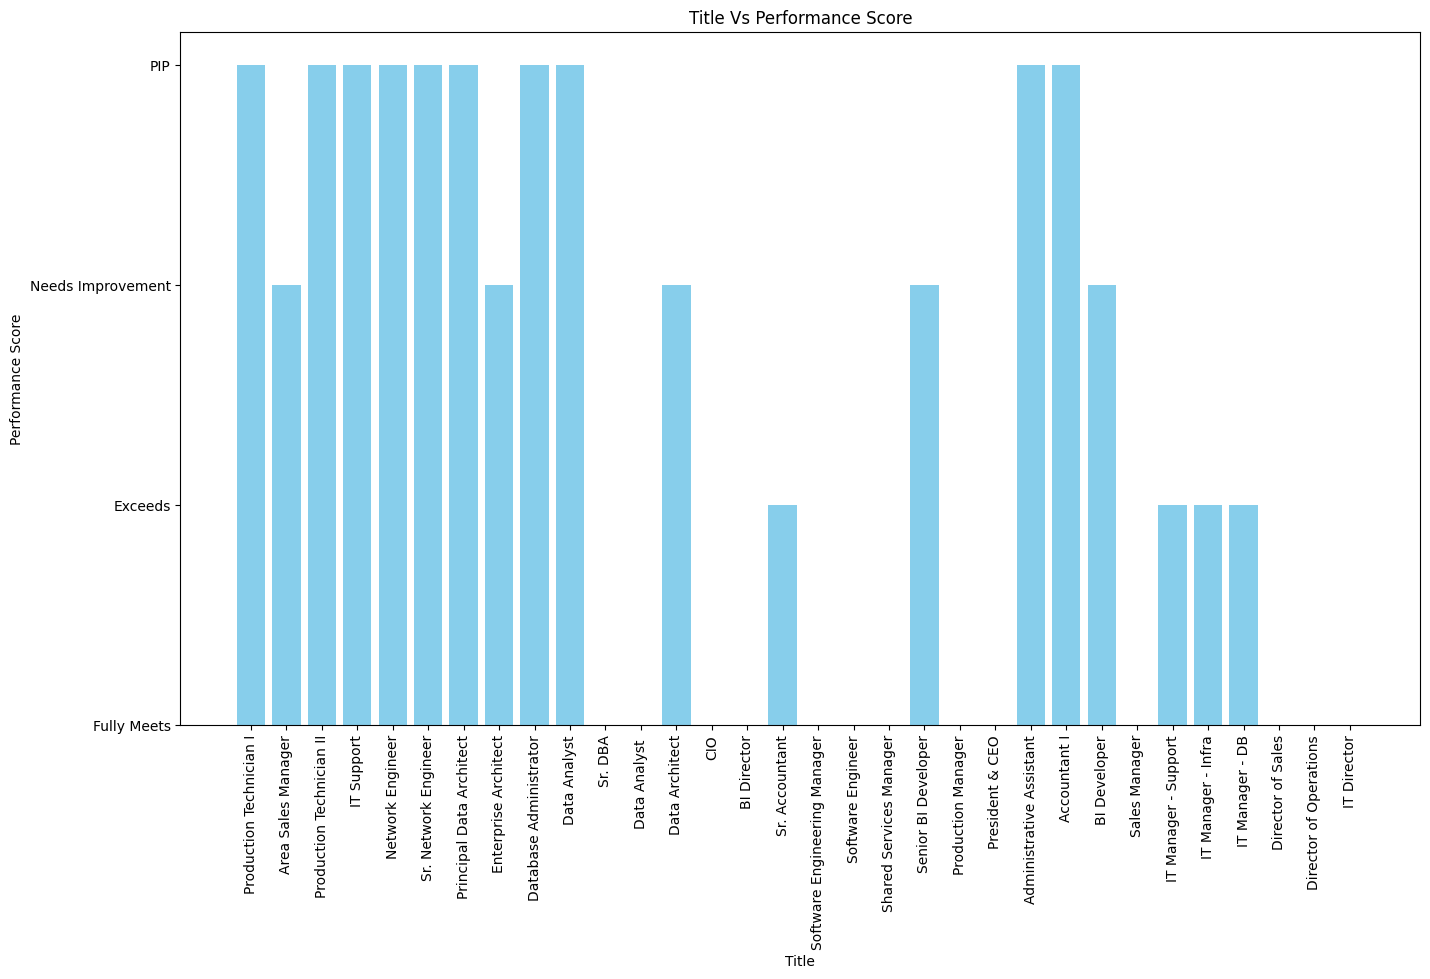

In [20]:
plt.figure(figsize=(16, 9))  
plt.bar(df["Title"], df["Performance Score"], color='skyblue')  
plt.title("Title Vs Performance Score")  
plt.xlabel("Title")  
plt.ylabel("Performance Score")  
plt.xticks(rotation=90)  
plt.show()

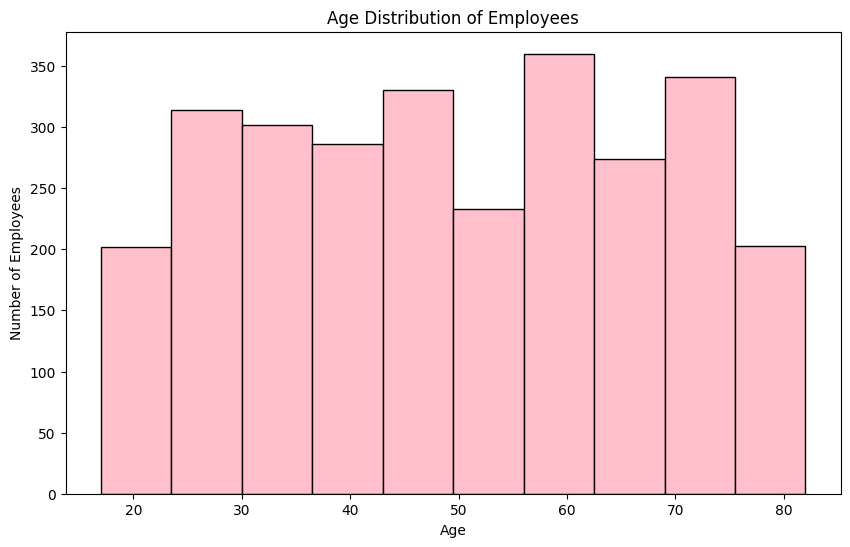

In [21]:
plt.figure(figsize=(10, 6))  
plt.hist(df["Age"], bins=10, color='pink', edgecolor='black')  
plt.title("Age Distribution of Employees")  
plt.xlabel("Age")  
plt.ylabel("Number of Employees")  
plt.show()


# Outlier Detection

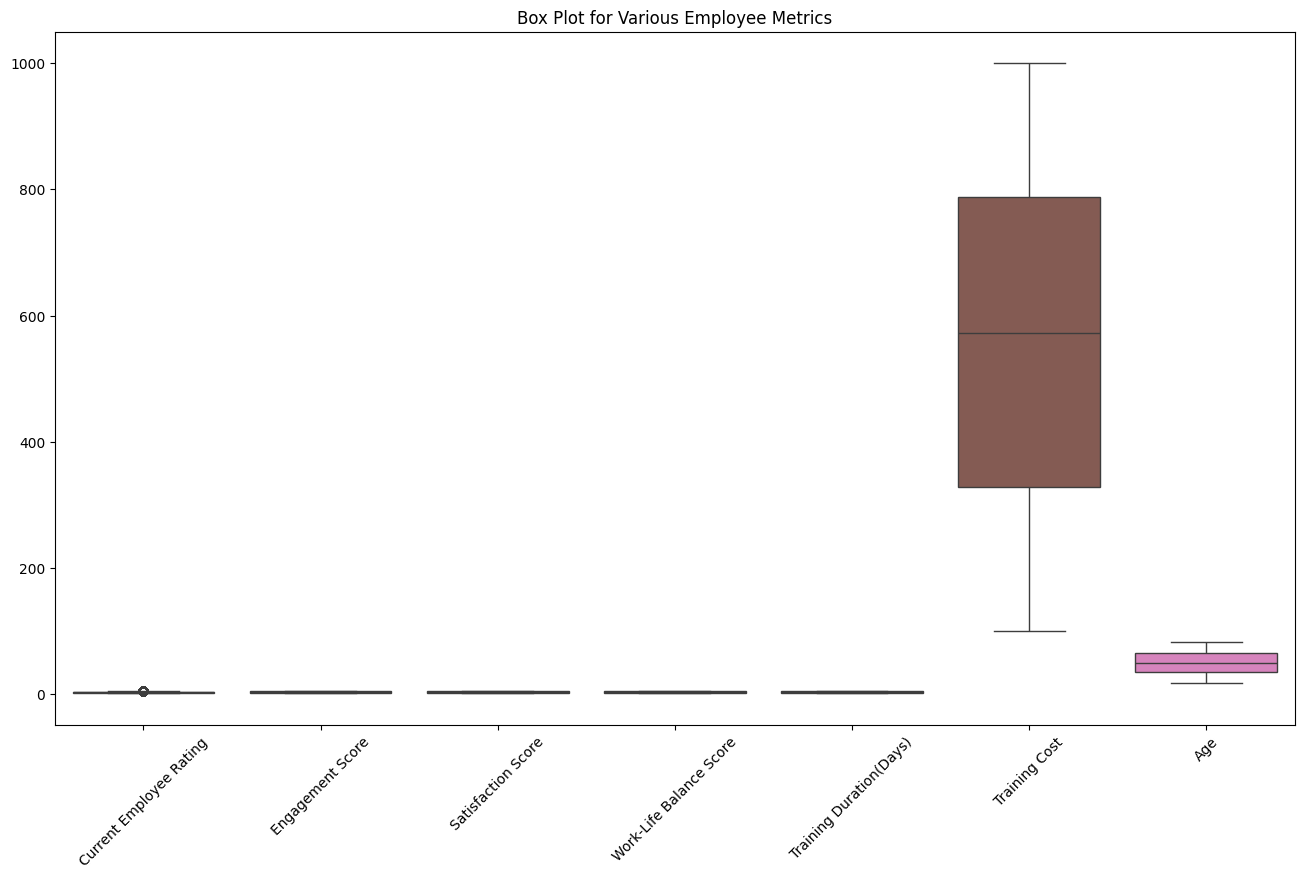

In [22]:
plt.figure(figsize=(16, 9))
sns.boxplot(data=df[["Current Employee Rating", "Engagement Score", "Satisfaction Score", 
                     "Work-Life Balance Score", "Training Duration(Days)", "Training Cost", "Age"]])
plt.title("Box Plot for Various Employee Metrics")
plt.xticks(rotation=45)  
plt.show()

# Checking Termination based on JobType position (Temporary, Full-time, Part-time)

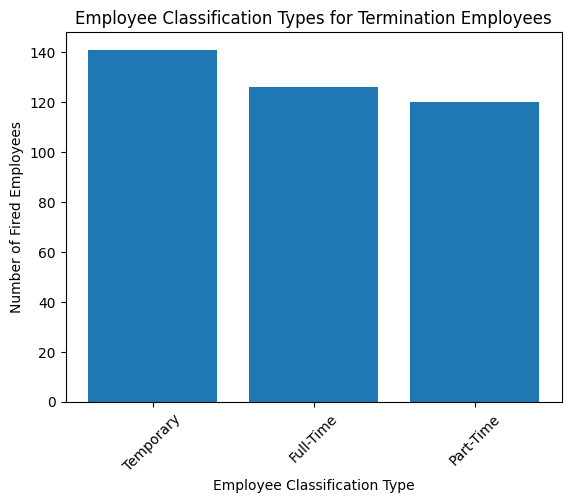

In [23]:
import matplotlib.pyplot as plt

Terminated_employees = df[df["EmployeeStatus"].str.strip() == "Terminated"]


classification_counts = Terminated_employees["EmployeeClassificationType"].value_counts()

plt.bar(classification_counts.index, classification_counts)
plt.xlabel('Employee Classification Type')
plt.ylabel('Number of Fired Employees')
plt.title('Employee Classification Types for Termination Employees')
plt.xticks(rotation=45)
plt.show()


# The code filters the data to focus on employees who were terminated and then counts how many people in each job position 
# (referred to as "Employee Classification Type") were let go. After counting these employees, the code generates a bar chart to
# visually represent the number of terminated employees in each job category. This chart helps to quickly see which positions have 
# the highest number of terminations, providing useful insights into employee turnover by role.

# Checking employee Active status based on JobType position (Temporary, Full-time, Part-time)

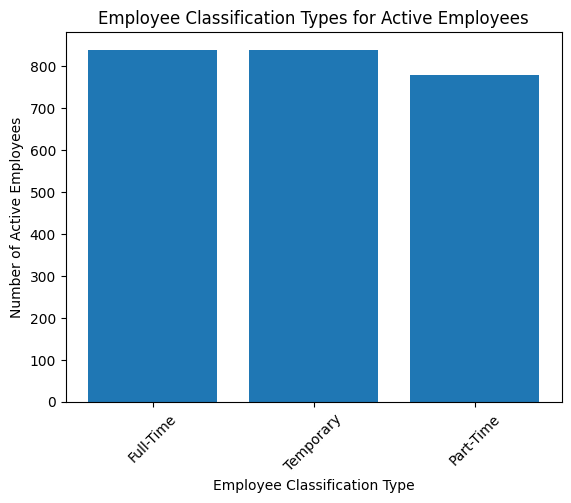

In [24]:
import matplotlib.pyplot as plt

Terminated_employees = df[df["EmployeeStatus"].str.strip() == "Active"]


classification_counts = Terminated_employees["EmployeeClassificationType"].value_counts()

plt.bar(classification_counts.index, classification_counts)
plt.xlabel('Employee Classification Type')
plt.ylabel('Number of Active Employees')
plt.title('Employee Classification Types for Active Employees')
plt.xticks(rotation=45)
plt.show()


# The code filters the data to focus on employees who were Active and then counts how many people in each job position 
# (referred to as "Employee Classification Type") were let go. After counting these employees, the code generates a bar chart to
# visually represent the number of terminated employees in each job category. This chart helps to quickly see which positions have 
# the highest number of terminations, providing useful insights into employee turnover by role.

# Checking Terminated employee status based on Age

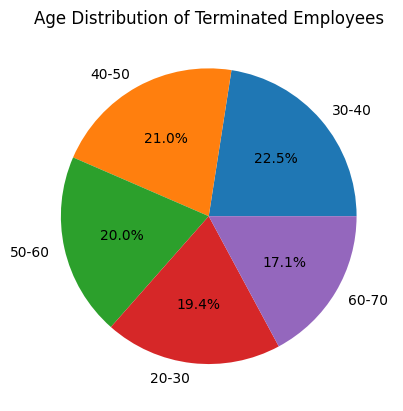

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

Terminated_employees = df[df["EmployeeStatus"].str.strip() == "Terminated"]

age_ranges = pd.cut(Terminated_employees["Age"], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

age_counts = age_ranges.value_counts()

plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution of Terminated Employees')
plt.show()


# This code analyzes the age distribution of terminated employees. It first filters the dataset to focus on employees whose 
# status is "Terminated." Then, it groups these employees into age ranges (20-30, 30-40, 40-50, etc.) and counts how many 
# employees fall into each age group. Finally,it visualizes this information using a pie chart, showing the percentage of 
# terminated employees in each age range. The pie chart helps to easily understand the distribution of employee ages among those
# who were terminated.

# Checking Active employee status based on Age

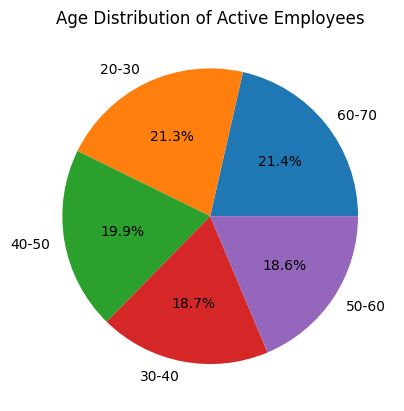

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

Terminated_employees = df[df["EmployeeStatus"].str.strip() == "Active"]

age_ranges = pd.cut(Terminated_employees["Age"], bins=[20, 30, 40, 50, 60, 70], labels=['20-30', '30-40', '40-50', '50-60', '60-70'])

age_counts = age_ranges.value_counts()

plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%')
plt.title('Age Distribution of Active Employees')
plt.show()


# This code analyzes the age distribution of active employees. It first filters the dataset to focus on employees whose 
# status is "Terminated." Then, it groups these employees into age ranges (20-30, 30-40, 40-50, etc.) and counts how many 
# employees fall into each age group. Finally,it visualizes this information using a pie chart, showing the percentage of 
# terminated employees in each age range. The pie chart helps to easily understand the distribution of employee ages among those
# who were terminated.

# 3.) ColumnTransformer

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

one_hot_columns = [
    "BusinessUnit", "EmployeeStatus", "EmployeeType", "DepartmentType", "Division", 
    "State", "GenderCode", "RaceDesc", "MaritalDesc", "Training Program Name", "Training Type"
]

ordinal_columns = [
    "Title", "PayZone", "EmployeeClassificationType", "Performance Score", "Training Outcome"
]

transformer_Scaled = ColumnTransformer(transformers=[
    ("Ordinal", OrdinalEncoder(), ordinal_columns),
    ("OneHotEncoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False), one_hot_columns),
    ("StandardScaler", StandardScaler(), ["Age"])  
], remainder="passthrough")


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

one_hot_columns = [
    "BusinessUnit", "EmployeeStatus", "EmployeeType", "DepartmentType", "Division", 
    "State", "GenderCode", "RaceDesc", "MaritalDesc", "Training Program Name", "Training Type"
]

ordinal_columns = [
    "Title", "PayZone", "EmployeeClassificationType", "Performance Score", "Training Outcome"
]

# Updated with sparse=False for dense output
transformer1 = ColumnTransformer(transformers=[
    ("Ordinal", OrdinalEncoder(), ordinal_columns),
    ("OneHotEncoder", OneHotEncoder(handle_unknown="ignore"), one_hot_columns)  
], remainder="passthrough")
 

In [29]:
df_transformed_Scaled = transformer_Scaled.fit_transform(df)  


In [30]:
df_transformed = transformer1.fit_transform(df)

# 4.) PCA

In [31]:
pca = PCA(n_components=25) 
df_pca = pca.fit_transform(df_transformed_Scaled)  

In [32]:
df_pca.shape

(2845, 25)

# 5.) Train_Test_Split

In [33]:
X = df_pca
y = df["Training Cost"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 44)


# 6.) Model's

# LinearRegression Regression()

In [35]:
lr = LinearRegression()
lr

LinearRegression()

In [36]:
lr = LinearRegression().fit(X_train,y_train)

In [37]:
y_pred = lr.predict(X_train)

In [38]:
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')


MSE: 9.796985962151969e-10
RMSE: 3.130013731943036e-05
MAE: 2.5229573561987864e-05
R² Score: 0.9999999999999859


# SVR Regression()

In [39]:
svr = SVR(kernel='rbf')  
svr.fit(X, y)

SVR()

In [40]:
y_pred = svr.predict(X)

In [41]:
svr = SVR(kernel='rbf')  
svr.fit(X_train, y_train)

y_pred = svr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')

MSE: 1614.4905589461305
RMSE: 40.18072372352358
MAE: 20.3169345038104
R² Score: 0.9767861955542704


# RandomForest Regression()

In [42]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)  

mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R² Score: {r2}')


MSE: 0.2171696121616846
RMSE: 0.46601460509482384
MAE: 0.3541121265377811
R² Score: 0.9999968241448992


# Ensemble Method

# AdaBoost 

In [50]:
X = df_pca  
y = df["Training Cost"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

base_estimator = DecisionTreeRegressor(max_depth=1)

ada_boost = AdaBoostRegressor(estimator=base_estimator, n_estimators=50, random_state=42)

ada_boost.fit(X_train, y_train)

y_pred = ada_boost.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R_2 Score:", r2)

Mean Squared Error: 16913.98002502842
R_2 Score: 0.752652550225761


# Gradient Boosting

In [59]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R_2 Score:", r2)



Mean Squared Error: 3.541605394700867
Mean Absolute Error: 1.4397559265847892
R_2 Score: 0.999948208105887
